In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [117]:
train_data=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
test_data=df_test.copy()

In [118]:
print(train_data.shape,
df_test.shape)

(891, 12) (418, 11)


In [119]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [122]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
135,1027,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,350409,7.8542,NaN,S
130,1022,3,"Spinner, Mr. Henry John",male,32.0,0,0,STON/OQ. 369943,8.0500,NaN,S
173,1065,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C
392,1284,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
85,977,3,"Khalil, Mr. Betros",male,NaN,1,0,2660,14.4542,NaN,C


In [123]:
print(train_data.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [124]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [126]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
train_data.duplicated().sum()

0

In [129]:
df_test.duplicated().sum()

0

In [130]:
train_data[['Survived','Age','SibSp','Parch','Fare']].corr()

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


In [131]:
df_train=train_data.copy()

<Axes: title={'center': 'Trian data Survived'}, xlabel='Survived', ylabel='count'>

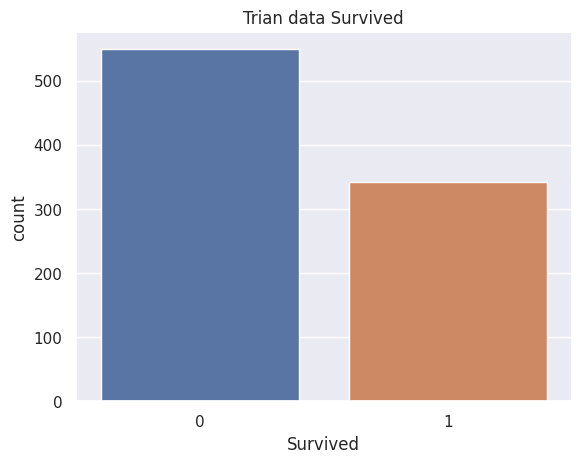

In [132]:
plt.title('Trian data Survived')
sns.countplot(x=df_train['Survived'])

Text(0.5, 1.0, 'Test data Pclass')

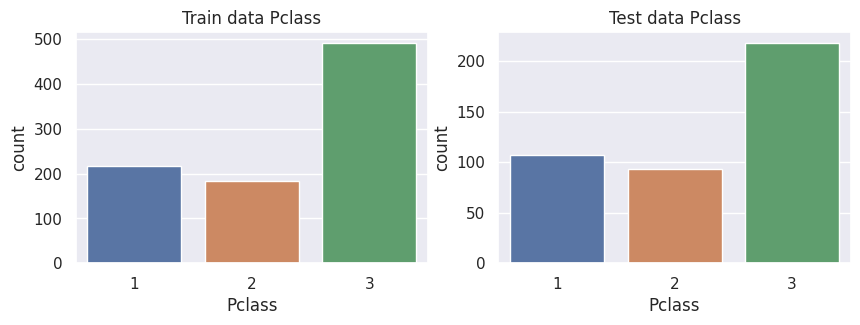

In [133]:
sns.set()
fig,axes=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df_train.Pclass,ax=axes[0]).set_title("Train data Pclass")
sns.countplot(x=df_test.Pclass,ax=axes[1]).set_title('Test data Pclass')

Text(0.5, 1.0, 'Test data Sex')

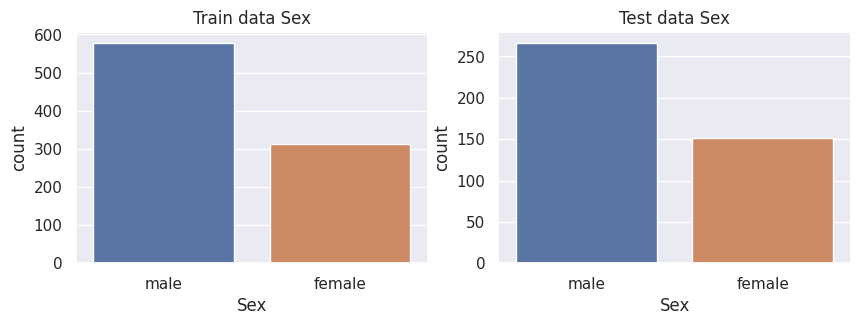

In [134]:
sns.set()
fig,axes=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df_train.Sex,ax=axes[0]).set_title("Train data Sex")
sns.countplot(x=df_test.Sex,ax=axes[1]).set_title('Test data Sex')

Text(0.5, 1.0, 'Test data Embarked')

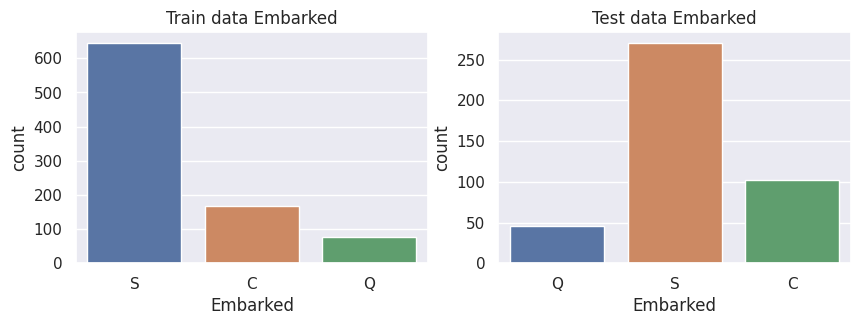

In [135]:
sns.set()
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df_train.Embarked,ax=axs[0]).set_title('Train data Embarked')
sns.countplot(x=df_test.Embarked,ax=axs[1]).set_title('Test data Embarked')

In [136]:
# handling missing value Embarked
k=df_train[df_train.Embarked.isnull()].index

In [137]:
df_test.Embarked.isnull().sum()

0

In [138]:
df_train.loc[k][['Pclass','Embarked','Age']]

,Pclass,Embarked,Age
61,1,NaN,38.0
829,1,NaN,62.0


In [139]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Test data')

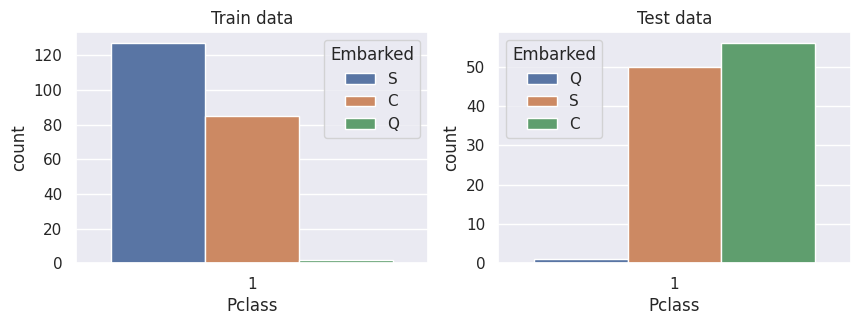

In [141]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df_train[df_train.Pclass==1]['Pclass'],hue=df_train.Embarked,ax=axs[0]).set_title('Train data')
sns.countplot(x=df_test[df_test.Pclass==1]['Pclass'],hue=df_test.Embarked,ax=axs[1]).set_title('Test data')

In [142]:
df_train[df_train.Pclass==1]['Embarked'].mode().values[0]

'S'

In [143]:
df_train.loc[k,'Embarked']=df_train[df_train.Pclass==1]['Embarked'].mode().values[0]

In [144]:
df_train.loc[k][['Pclass','Embarked','Age']]

,Pclass,Embarked,Age
61,1,S,38.0
829,1,S,62.0


Text(0.5, 1.0, 'Test data Embarked/Age')

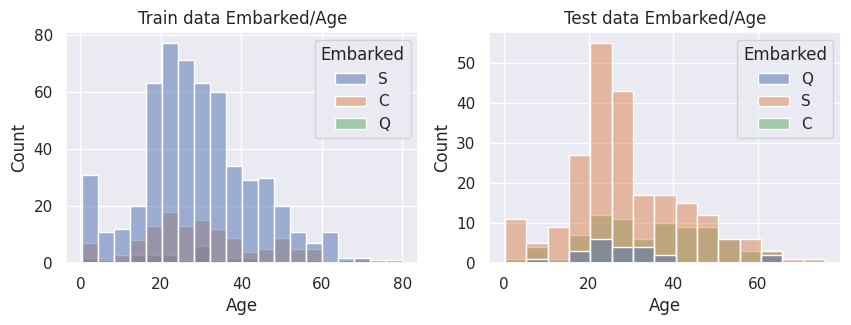

In [145]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.histplot(data=df_train,x='Age',hue='Embarked',ax=axs[0]).set_title('Train data Embarked/Age')
sns.histplot(data=df_test,x='Age',hue='Embarked',ax=axs[1]).set_title('Test data Embarked/Age')


Text(0.5, 1.0, 'Trian data Age/Survived')

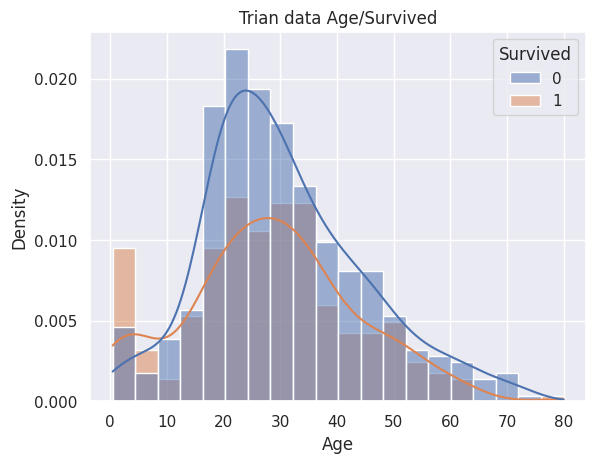

In [146]:
sns.histplot(x='Age',hue='Survived',kde=True,stat='density',data=df_train).set_title('Trian data Age/Survived')


Text(0.5, 1.0, 'Comparision between Age and Pclass')

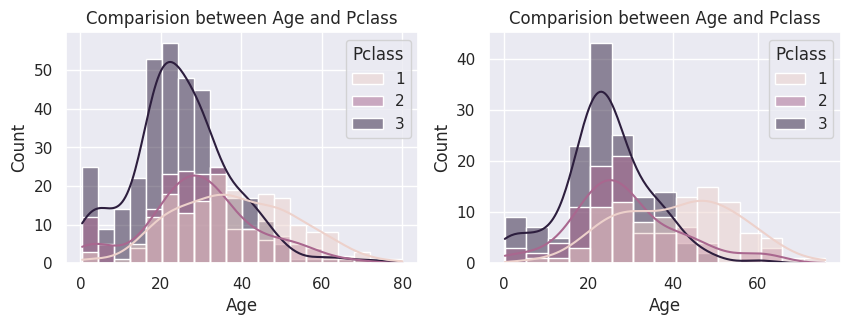

In [147]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.histplot(x=df_train.Age,hue=df_train.Pclass,kde=True,ax=axs[0]).set_title('Comparision between Age and Pclass')
sns.histplot(x=df_test.Age,hue=df_test.Pclass,kde=True,ax=axs[1]).set_title('Comparision between Age and Pclass')

In [148]:
# handling missing value of age
y=df_train[df_train.Age.isnull()]['Age'].index
df_train.fillna(0,inplace=True)
gp=df_train[df_train.Age==0][['Age','Pclass']].groupby('Pclass').count()
gp

,Age
Pclass,
1,30
2,11
3,136


In [149]:
# test data

df_test.fillna(0,inplace=True)
o=df_test[df_test.Age==0].index
ts=df_test[df_test.Age==0][['Age',"Pclass"]].groupby('Pclass').count()
ts

,Age
Pclass,
1,9
2,5
3,72


In [150]:
# imputing age for pclass 1 passenger(train)
a=np.percentile(df_train[df_train['Pclass']==1]['Age'],25)
b=np.percentile(df_train[df_train['Pclass']==1]['Age'],100)
x=np.random.RandomState(100) # or use .seed(2)
p1=x.randint(a,b,30)
p1

array([29, 45, 24, 60, 44, 36, 69, 31, 51, 73, 55, 74, 23, 55, 35, 55, 70,
       69, 45, 36, 57, 64, 79, 37, 30, 50, 43, 23, 48, 65])

In [151]:
# imputing age for pclass 1 passenger(test)
a=np.percentile(df_test[df_test['Pclass']==1]['Age'],25)
b=np.percentile(df_test[df_test['Pclass']==1]['Age'],100)
x=np.random.RandomState(100) # or use .seed(2)
tp1=x.randint(a,b,9)
tp1

array([35, 51, 30, 66, 50, 42, 75, 37, 57])

In [152]:
ab=df_train[(df_train['Pclass']==1) & (df_train['Age']==0)].index

In [153]:
df_train.loc[ab,'Age']=p1

In [154]:
ab=df_test[(df_test['Pclass']==1) & (df_test['Age']==0)].index

In [155]:
df_test.loc[ab,'Age']=tp1

In [156]:
# imputing age for pclass 2 passenger(train)
a=np.percentile(df_train[df_train['Pclass']==2]['Age'],25)
b=np.percentile(df_train[df_train['Pclass']==2]['Age'],100)
x=np.random.RandomState(100)
p2=x.randint(a,b,11)
p2


array([28, 44, 23, 59, 43, 35, 68, 30, 50, 54, 22])

In [157]:
ab=df_train[(df_train['Pclass']==2) & (df_train['Age']==0)].index
ab

Int64Index([17, 181, 277, 303, 413, 466, 481, 547, 596, 674, 732], dtype='int64')

In [158]:
df_train.loc[ab,'Age']=p2

In [159]:
# imputing age for pclass 2 passenger(test)
a=np.percentile(df_test[df_test['Pclass']==2]['Age'],25)
b=np.percentile(df_test[df_test['Pclass']==2]['Age'],100)
x=np.random.RandomState(100)
tp2=x.randint(a,b,5)
tp2


array([28, 44, 23, 59, 43])

In [160]:
ab=df_test[(df_test['Pclass']==2) & (df_test['Age']==0)].index
ab

Int64Index([54, 65, 84, 301, 384], dtype='int64')

In [161]:
df_test.loc[ab,'Age']=tp2

In [162]:
# imputing age for pclass 3 passenger (train)
a=np.percentile(df_train[df_train['Pclass']==3]['Age'],50)
b=np.percentile(df_train[df_train['Pclass']==3]['Age'],75)
x=np.random.RandomState(1000)
p3=x.randint(a,b,136)

for i in range(136):
    if p3[i]==0:
       p3[i]=p3.mean().round()
       
p3

array([23, 27, 27, 20, 21, 20, 28, 24, 24, 24, 22, 28, 22, 24, 22, 25, 25,
       24, 20, 24, 22, 25, 24, 27, 20, 24, 27, 21, 20, 22, 21, 27, 21, 25,
       26, 25, 27, 28, 28, 22, 22, 26, 23, 23, 26, 25, 28, 24, 21, 20, 21,
       28, 28, 20, 22, 23, 26, 22, 25, 28, 25, 26, 26, 27, 26, 23, 24, 28,
       21, 23, 27, 22, 20, 24, 24, 21, 26, 25, 21, 24, 21, 27, 24, 25, 20,
       26, 22, 27, 20, 28, 20, 25, 23, 20, 24, 23, 23, 23, 26, 24, 27, 22,
       24, 24, 22, 24, 21, 22, 23, 20, 25, 22, 21, 20, 26, 28, 26, 21, 21,
       20, 28, 24, 22, 22, 21, 28, 22, 20, 21, 21, 21, 23, 26, 24, 26, 28])

In [163]:
ab=df_train[(df_train['Pclass']==3) & (df_train['Age']==0)].index
ab

Int64Index([  5,  19,  26,  28,  29,  32,  36,  42,  45,  46,
            ...
            826, 828, 832, 837, 846, 859, 863, 868, 878, 888],
           dtype='int64', length=136)

In [164]:
df_train.loc[ab,'Age']=p3

In [165]:
# imputing age for pclass 3 passenger (test)
a=np.percentile(df_test[df_test['Pclass']==3]['Age'],50)
b=np.percentile(df_test[df_test['Pclass']==3]['Age'],90)
x=np.random.RandomState(1000)
tp3=x.randint(a,b,72)

for i in range(72):
    if p3[i]==0:
       p3[i]=p3.mean().round()
       
tp3

array([25, 18, 19, 18, 31, 26, 27, 22, 31, 33, 28, 27, 22, 27, 31, 28, 32,
       23, 30, 29, 29, 18, 22, 25, 34, 29, 18, 31, 19, 29, 32, 33, 33, 23,
       29, 30, 23, 26, 20, 31, 27, 24, 28, 28, 21, 33, 19, 18, 26, 26, 34,
       20, 29, 27, 31, 32, 33, 27, 24, 27, 27, 30, 22, 26, 19, 21, 31, 31,
       31, 25, 18, 22])

In [166]:
ab=df_test[(df_test['Pclass']==3) & (df_test['Age']==0)].index
ab

Int64Index([ 10,  29,  33,  36,  39,  47,  58,  76,  83,  85,  88,  91,  93,
            102, 107, 108, 111, 116, 121, 124, 127, 132, 133, 151, 160, 163,
            170, 173, 183, 188, 199, 200, 211, 216, 219, 225, 227, 233, 243,
            244, 249, 255, 256, 265, 267, 268, 271, 273, 274, 282, 286, 288,
            289, 292, 297, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 408, 410, 413, 416, 417],
           dtype='int64')

In [167]:
df_test.loc[ab,'Age']=tp3

In [168]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [169]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [170]:
print(train_data.Age.mean(),df_train.Age.mean())

29.69911764705882 29.588294051627383


In [171]:
print(test_data.Age.mean(),df_test.Age.mean())

30.272590361445783 30.11602870813397


Text(0.5, 1.0, 'Train Data After')

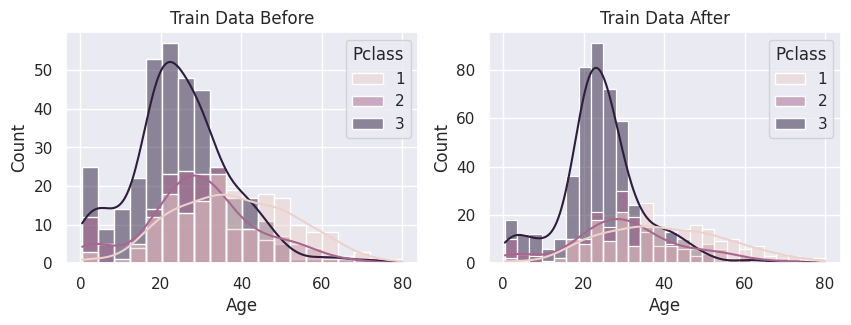

In [172]:

fig,axs=plt.subplots(1,2,figsize=(10,3))

sns.histplot(x=train_data.Age,hue=train_data.Pclass,kde=True,ax=axs[0]).set_title('Train Data Before')
sns.histplot(x=df_train.Age,hue=df_train.Pclass,kde=True,ax=axs[1]).set_title('Train Data After')


Text(0.5, 1.0, 'Test Data After')

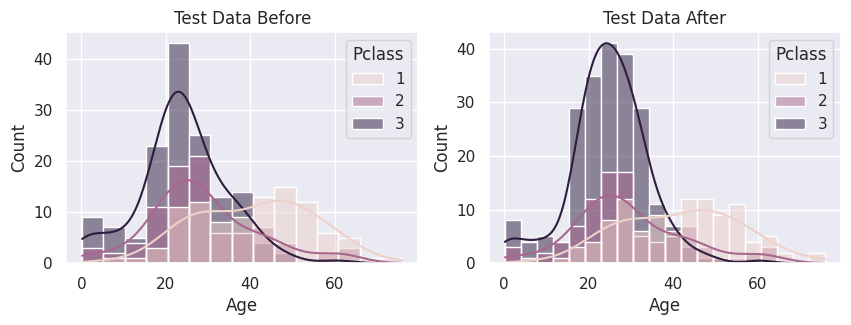

In [173]:

fig,axs=plt.subplots(1,2,figsize=(10,3))

sns.histplot(x=test_data.Age,hue=test_data.Pclass,kde=True,ax=axs[0]).set_title('Test Data Before')
sns.histplot(x=df_test.Age,hue=df_test.Pclass,kde=True,ax=axs[1]).set_title('Test Data After')


Text(0.5, 1.0, 'Train Data After')

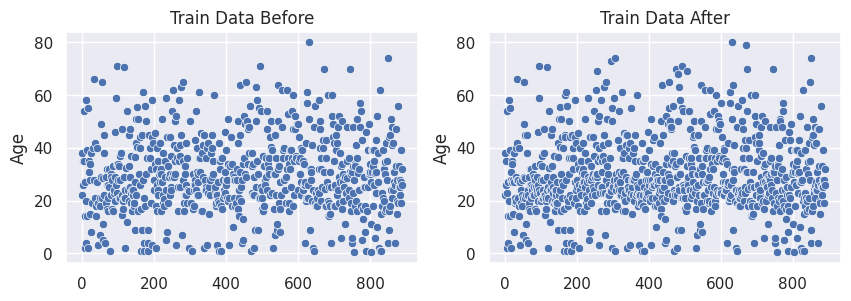

In [174]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(train_data.Age,ax=axs[0]).set_title('Train Data Before')
sns.scatterplot(df_train.Age,ax=axs[1]).set_title('Train Data After')


Text(0.5, 1.0, 'Test Data After')

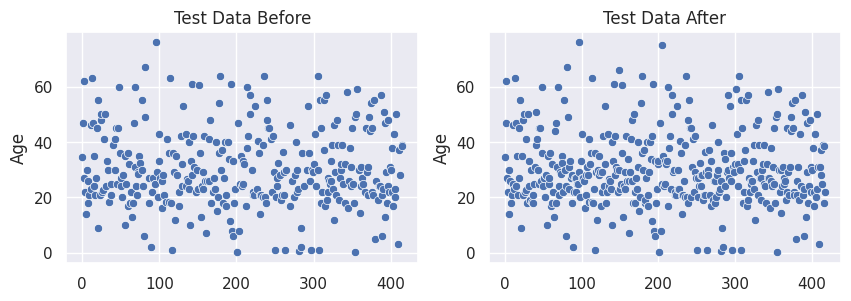

In [175]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(test_data.Age,ax=axs[0]).set_title('Test Data Before')
sns.scatterplot(df_test.Age,ax=axs[1]).set_title('Test Data After')

<Axes: xlabel='Age'>

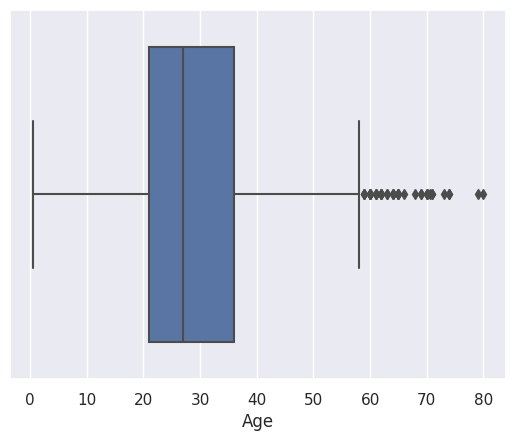

In [176]:
sns.boxplot(x=df_train.Age)

<Axes: xlabel='Fare'>

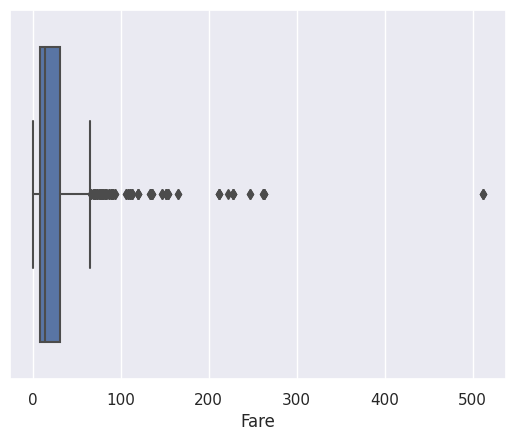

In [177]:
sns.boxplot(x=df_train.Fare)

Text(0.5, 1.0, 'Train data')

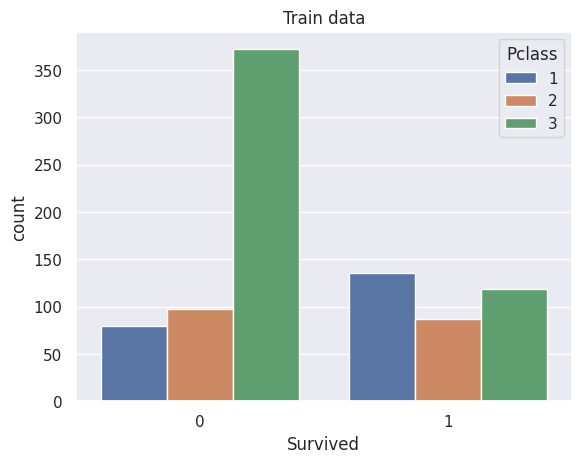

In [178]:
# bivariate analysis

sns.countplot(x='Survived',hue='Pclass',data=df_train).set_title('Train data')


Text(0.5, 1.0, 'Test data')

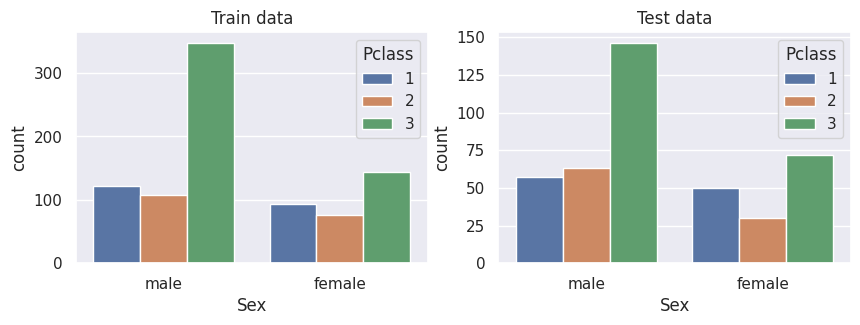

In [179]:
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='Sex',hue='Pclass',data=df_train,ax=axs[0]).set_title('Train data')
sns.countplot(x='Sex',hue='Pclass',data=df_test,ax=axs[1]).set_title('Test data')

<Axes: xlabel='Survived', ylabel='count'>

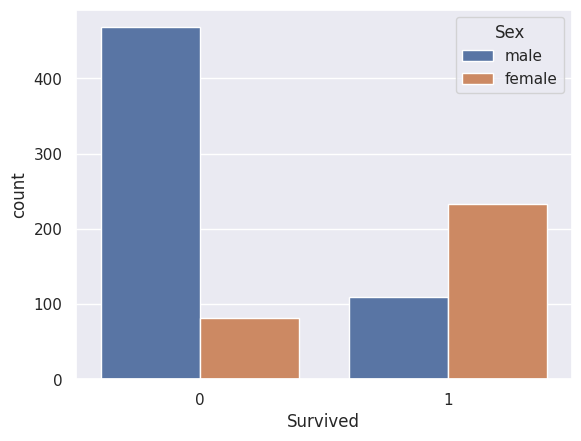

In [180]:
sns.countplot(x=train_data.Survived,hue='Sex',data=df_train)

In [181]:
df_train.drop(columns=['Cabin'],inplace=True)

In [182]:
df_test.drop(columns=['Cabin'],inplace=True)

In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [184]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

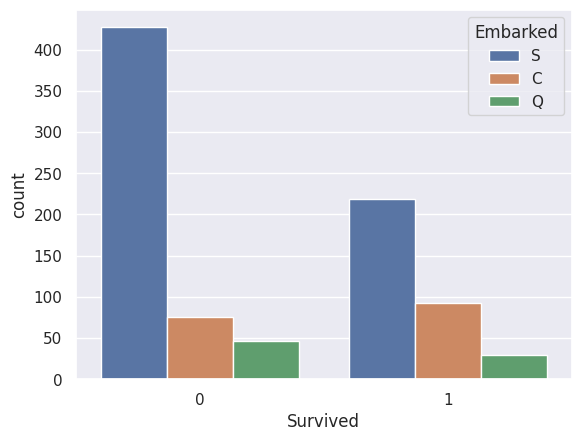

In [185]:
sns.countplot(data=df_train,x='Survived',hue='Embarked')

**Note**
1) Most people who Embark from Southampton died and many people survived also of Southampton .<br>
2) Most people who's age is 32 or less were in Pclass 3. <br>
3) Male person died more as compare to female. Most os male were in Pclass 3.<br>


In [186]:
print(f'{df_train.Pclass.value_counts()},\n{df_train.Sex.value_counts()}')
print(f'{df_test.Pclass.value_counts()},\n{df_test.Sex.value_counts()}')

3    491
1    216
2    184
Name: Pclass, dtype: int64,
male      577
female    314
Name: Sex, dtype: int64
3    218
1    107
2     93
Name: Pclass, dtype: int64,
male      266
female    152
Name: Sex, dtype: int64


In [187]:
S1=df_train[(df_train.Embarked=='S') & (df_train.Survived==1)]['Survived'].count()
S0=df_train[(df_train.Embarked=='S') & (df_train.Survived==0)]['Survived'].count()
C1=df_train[(df_train.Embarked=='C') & (df_train.Survived==1)]['Survived'].count()
C0=df_train[(df_train.Embarked=='C') & (df_train.Survived==0)]['Survived'].count()
Q1=df_train[(df_train.Embarked=='Q') & (df_train.Survived==1)]['Survived'].count()
Q0=df_train[(df_train.Embarked=='Q') & (df_train.Survived==1)]['Survived'].count()

In [188]:
a={'Survived':[S1,C1,Q1],'Died':[S0,C0,Q0]}
dat=pd.DataFrame(data=a,index=['S','C','Q'])

<Axes: title={'center': 'No people survived and died (Embarked)'}>

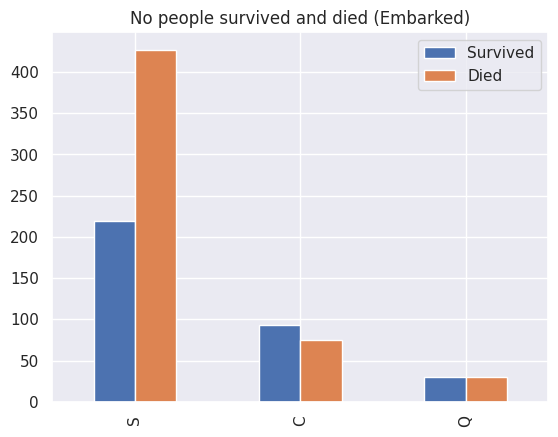

In [189]:
dat.plot(kind='bar',title='No people survived and died (Embarked)')


array([<Axes: ylabel='Survived'>, <Axes: ylabel='Died'>], dtype=object)

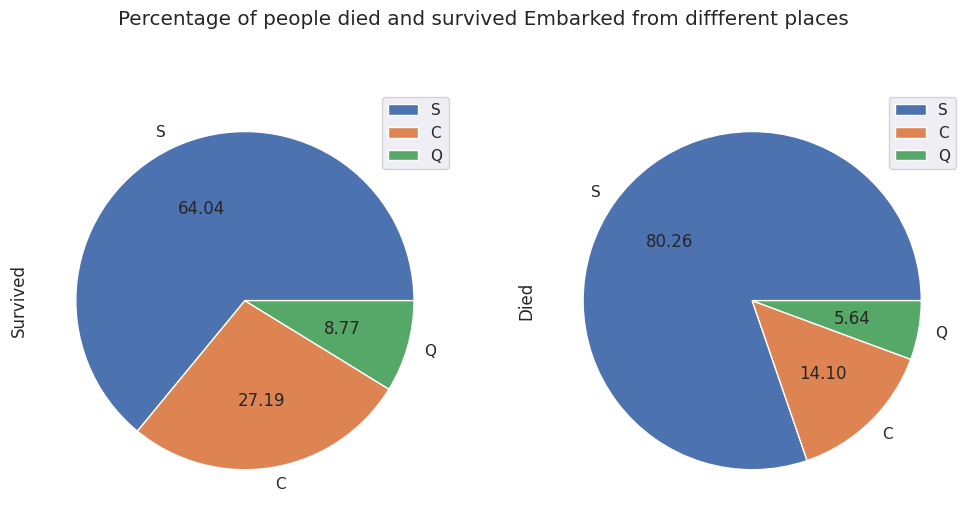

In [190]:
dat.plot(kind='pie',subplots=True,figsize=(12,6),autopct='%.2f',title="Percentage of people died and survived Embarked from diffferent places")

In [191]:
p1_1=df_train[(df_train.Pclass==1) & (df_train.Survived==1)]['Survived'].count()/891*100
p1_2=df_train[(df_train.Pclass==2) & (df_train.Survived==1)]['Survived'].count()/891*100
p1_3=df_train[(df_train.Pclass==3) & (df_train.Survived==1)]['Survived'].count()/891*100
p0_1=df_train[(df_train.Pclass==1) & (df_train.Survived==0)]['Survived'].count()/891*100
p0_2=df_train[(df_train.Pclass==2) & (df_train.Survived==0)]['Survived'].count()/891*100
p0_3=df_train[(df_train.Pclass==3) & (df_train.Survived==0)]['Survived'].count()/891*100

In [192]:
b={'Survived':[p1_1,p1_2,p1_3],'Died':[p0_1,p0_2,p0_3]}
dt2=pd.DataFrame(data=b,index=[1,2,3])

<Axes: >

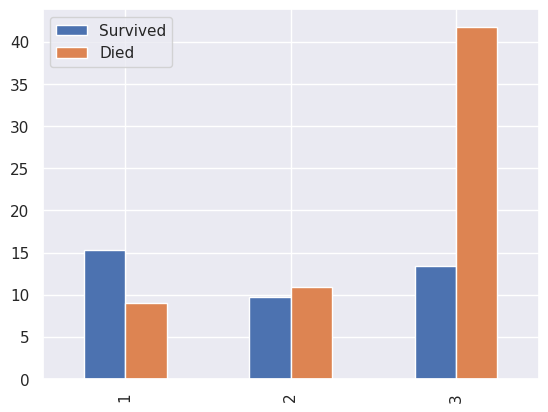

In [193]:
dt2.plot(kind='bar')

array([<Axes: ylabel='Survived'>, <Axes: ylabel='Died'>], dtype=object)

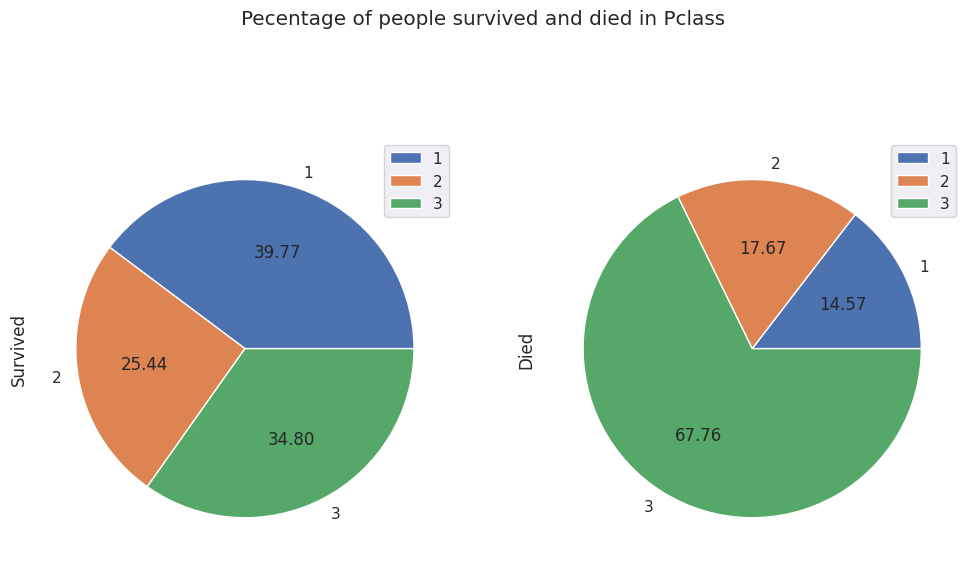

In [194]:
dt2.plot(kind='pie',subplots=True,autopct="%.2f",title='Pecentage of people survived and died in Pclass',figsize=(12,7))

In [195]:
mfs={'Male':[df_train[(df_train.Sex=='male') & (df_train.Survived==1)]['Survived'].count(),df_train[(df_train.Sex=='male') & (df_train.Survived==0)]['Survived'].count()],
             'Female':[df_train[(df_train.Sex=='female') & (df_train.Survived==1)]['Survived'].count(),df_train[(df_train.Sex=='female') & (df_train.Survived==0)]['Survived'].count()]}

array([<Axes: ylabel='Male'>, <Axes: ylabel='Female'>], dtype=object)

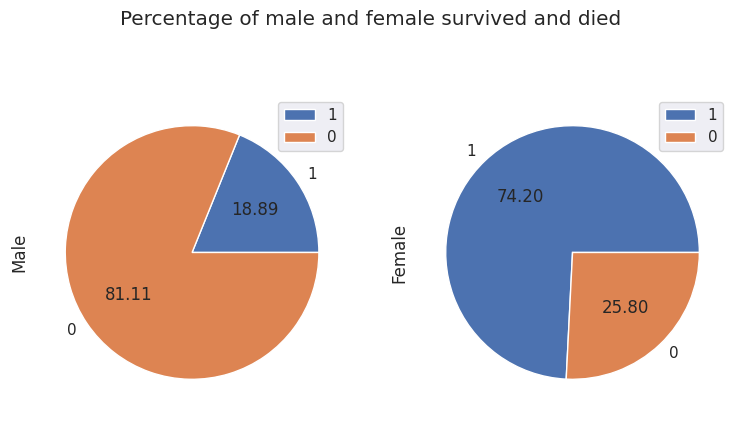

In [196]:
d=pd.DataFrame(data=mfs,index=[1,0])
d.plot(kind='pie',subplots=True,figsize=(9,5),autopct='%.2f',title='Percentage of male and female survived and died')

<Axes: ylabel='Male/Female pecentage of survival '>

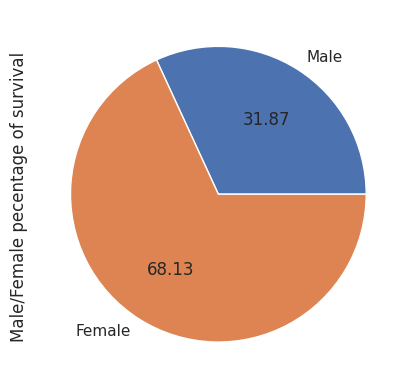

In [197]:
# compare between male female
d.iloc[0].plot(kind='pie',autopct='%.2f',label='Male/Female pecentage of survival ')



<Axes: ylabel='Male/Female pecentage of death'>

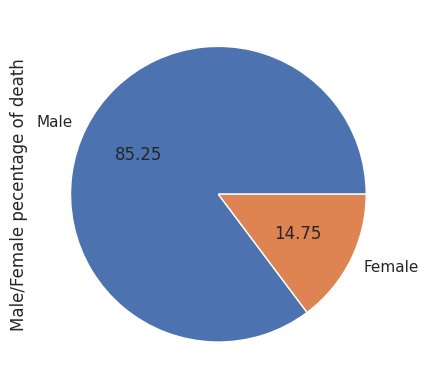

In [198]:
d.loc[0].plot(kind='pie',autopct='%.2f',label='Male/Female pecentage of death')

In [199]:
test_id=df_test.PassengerId

In [200]:
Family_sizer=df_train['SibSp']+df_train['Parch']
Family_sizes=df_test['SibSp']+df_test['Parch']


In [201]:
df_train.insert(4,'Family_size',Family_sizer)
df_test.insert(4,'Family_size',Family_sizes)

In [202]:
df_train.drop(columns=['Ticket','Name','PassengerId','SibSp','Parch','Fare'],inplace=True)
df_test.drop(columns=['Ticket','Name','PassengerId','SibSp','Parch','Fare'],inplace=True)

In [203]:
df_train.Family_size.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_size, dtype: int64

In [204]:
def famsize(x):
    if x<=4:
        return 'Small'
    elif x==5:
        return 'Medium'
    else:
        return 'Large'

In [205]:
df_train['Family_size']=df_train.Family_size.apply(famsize)

In [206]:
df_test['Family_size']=df_test.Family_size.apply(famsize)

In [207]:
df_train.shape

(891, 6)

In [208]:
df_test.shape

(418, 5)

In [209]:
df_train=df_train[['Pclass','Sex','Family_size','Age',"Embarked",'Survived']]

In [210]:
df_train.Age.value_counts()

24.00    52
22.00    46
21.00    42
28.00    40
25.00    35
         ..
55.50     1
0.92      1
23.50     1
73.00     1
34.50     1
Name: Age, Length: 92, dtype: int64

In [260]:
df_train

,Pclass,Sex,Family_size,Age,Embarked,Survived
0,3,male,Small,22.0,S,0
1,1,female,Small,38.0,C,1
2,3,female,Small,26.0,S,1
3,1,female,Small,35.0,S,1
4,3,male,Small,35.0,S,0
...,...,...,...,...,...,...
886,2,male,Small,27.0,S,0
887,1,female,Small,19.0,S,1
888,3,female,Small,28.0,S,0
889,1,male,Small,26.0,C,1


In [227]:
X=df_train.iloc[:,0:5]

In [237]:
transformer=ColumnTransformer(transformers=[
    ('tf1',OneHotEncoder(sparse_output=False,drop='first'),['Pclass','Sex','Family_size','Embarked']),
    ('tf2',MinMaxScaler(),["Age"])
],remainder='passthrough'
)

In [238]:
Xt=transformer.fit_transform(X)

In [239]:
Y=df_train.iloc[:,5].values

In [240]:
x_train,x_test,y_train,y_test=train_test_split(Xt,Y,test_size=0.2)

In [241]:
x_test.shape

(179, 8)

In [252]:
lmod=DecisionTreeClassifier()

In [253]:
lmod.fit(x_train,y_train)

DecisionTreeClassifier()

In [254]:
predic=lmod.predict(x_test)

In [256]:
accuracy_score(predic,y_test)

0.8268156424581006

In [223]:
test=transformer.fit_transform(df_test)